Data201 Group Project Code

Comparision of 40 Countries (grouped by their HDI index) to social and economic factors

Data sourced from http://hdr.undp.org/en/data

In [2]:
# Install tidyverse
library(tidyverse)
install.packages("rvest")
library(rvest)

Warning message:
"package 'rvest' is in use and will not be installed"

Read in the information from the CSV file Income_Index.csv

CSV file from the undp website, Source: http://hdr.undp.org/en/indicators/103606

In [22]:
# Read in information from CSV files
income_index <- read_csv("Income_Index.csv") 

Parsed with column specification:
cols(
  .default = col_double(),
  Country = col_character()
)
See spec(...) for full column specifications.


Each column was automatically parsed in as a 'character' type. As there are many columns, it's easier to transform it to a long dataset first, so there are less columns to change to numeric values, and this is easier than specifing what type the columns should be parsed in as.

To filter out 4 groups of countries to compare (from most developed to less developed) we chose 10 that were the most developed, 10 the least developed and 10 from the 66% percentile and 10 from 33% percentile, using HDI index.

In [23]:
# Create vectors for the HDI indexes used in each group
highest <- c(1:10) # Most developed countries (1-10)
high <- c(54:63) # 66 Percentile (53-63)
low <- c(117:126) # 33 Percentile (116-126)
lowest <-c(180:189) # Least developted countries (179-189)

Sort the income_index dataset by HDI rank, convert to long dataframe

In [24]:
# Create function to make long dataframe using the UN data
convert_to_long <- function(df, set)
    subset(df, HDI %in% set) %>% # Select the countries from the dataset with the given indexes
    select(-(HDI)) %>% # Remove HDI columns 
    gather(key = Year, Factor, -Country) %>% # Create Long Dataframe
    transform(Year = as.numeric(Year), Factor = as.numeric(Factor), check.names=FALSE)

In [27]:
income_index <- income_index %>%
    arrange(HDI) %>% # Sort dataframe by HDI rank
    na.omit()

# Create dataframe for eachs set of HDI indexes
income_index_highest <- convert_to_long(income_index, highest)
income_index_high <- convert_to_long(income_index, high)
income_index_low <- convert_to_long(income_index, low)
income_index_lowest <- convert_to_long(income_index, lowest)

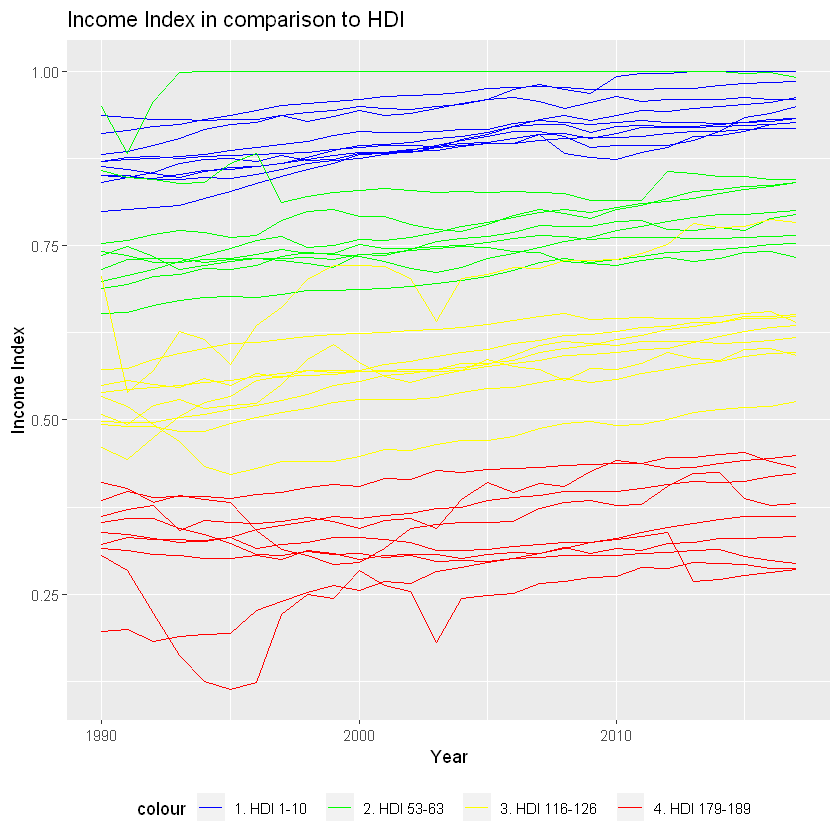

In [28]:
ggplot() + 
    geom_line(data = income_index_highest, aes(x = Year, y = Factor, group = Country, color = '1. HDI 1-10'))  +
    geom_line(data = income_index_high, aes(x = Year, y = Factor, group = Country, color = '2. HDI 53-63')) +
    geom_line(data = income_index_low, aes(x = Year, y = Factor, group = Country, color = '3. HDI 116-126')) +
    geom_line(data = income_index_lowest, aes(x = Year, y = Factor, group = Country, color = '4. HDI 179-189')) +
    scale_color_manual(values = c('1. HDI 1-10' = 'blue', '2. HDI 53-63' = 'green', '3. HDI 116-126' = 'yellow', '4. HDI 179-189' = 'red')) +
    ggtitle('Income Index in comparison to HDI') + xlab('Year') + ylab('Income Index') + theme(legend.position = ("bottom"))

Read in the information from the CSV file Income_Index.csv

CSV file from the undp website, Source: http://hdr.undp.org/en/indicators/140606

In [29]:
# Read in data from CSV file
unemployment <- read_csv("Unemployment_Total.csv")
glimpse(unemployment)

Parsed with column specification:
cols(
  HDI = col_double(),
  Country = col_character(),
  `1991` = col_double(),
  `1995` = col_double(),
  `2000` = col_double(),
  `2005` = col_double(),
  `2010` = col_double(),
  `2011` = col_double(),
  `2012` = col_double(),
  `2013` = col_double(),
  `2014` = col_double(),
  `2015` = col_double(),
  `2016` = col_double(),
  `2017` = col_double()
)


Observations: 195
Variables: 14
$ HDI     <dbl> 168, 68, 85, 147, 47, 83, 3, 20, 80, 54, 43, 136, 58, 53, 1...
$ Country <chr> "Afghanistan", "Albania", "Algeria", "Angola", "Argentina",...
$ `1991`  <dbl> 12.0, 22.3, 20.6, 23.7, 5.6, 2.0, 9.6, 3.4, 8.9, 12.2, 6.4,...
$ `1995`  <dbl> 8.7, 23.9, 27.9, 23.9, 18.8, 6.7, 8.5, 4.4, 8.0, 10.8, 5.9,...
$ `2000`  <dbl> 11.2, 22.7, 29.8, 23.7, 15.0, 10.9, 6.3, 4.7, 11.8, 7.2, 5....
$ `2005`  <dbl> 8.5, 17.5, 15.3, 21.4, 11.5, 8.2, 5.0, 5.6, 7.3, 10.2, 7.8,...
$ `2010`  <dbl> 7.8, 14.2, 10.0, 9.9, 7.4, 19.0, 5.2, 4.8, 5.6, 14.3, 1.1, ...
$ `2011`  <dbl> 8.2, 14.0, 10.0, 7.4, 7.1, 18.4, 5.1, 4.6, 5.4, 14.5, 1.2, ...
$ `2012`  <dbl> 7.9, 13.4, 11.0, 7.4, 7.3, 17.3, 5.2, 4.9, 5.2, 14.0, 1.2, ...
$ `2013`  <dbl> 8.5, 15.6, 9.8, 7.3, 6.6, 16.2, 5.7, 5.3, 5.0, 16.2, 1.2, 4...
$ `2014`  <dbl> 8.7, 17.5, 10.6, 7.3, 7.0, 17.5, 6.1, 5.6, 4.9, 13.8, 1.2, ...
$ `2015`  <dbl> 8.9, 17.1, 11.2, 7.3, 6.9, 18.3, 6.1, 5.7, 5.0, 12.0, 1.2, ...
$ `2016`  <dbl> 8.8,

In [30]:
# Sort by HDI and omit empty columns
unemployment <- unemployment %>%
    arrange(HDI) %>% # Sort dataframe by HDI rank
    na.omit()

# Create dataframe for eachs set of HDI indexes
unemployment_highest <- convert_to_long(unemployment, highest)
unemployment_high <- convert_to_long(unemployment, high)
unemployment_low <- convert_to_long(unemployment, low)
unemployment_lowest <- convert_to_long(unemployment, lowest)

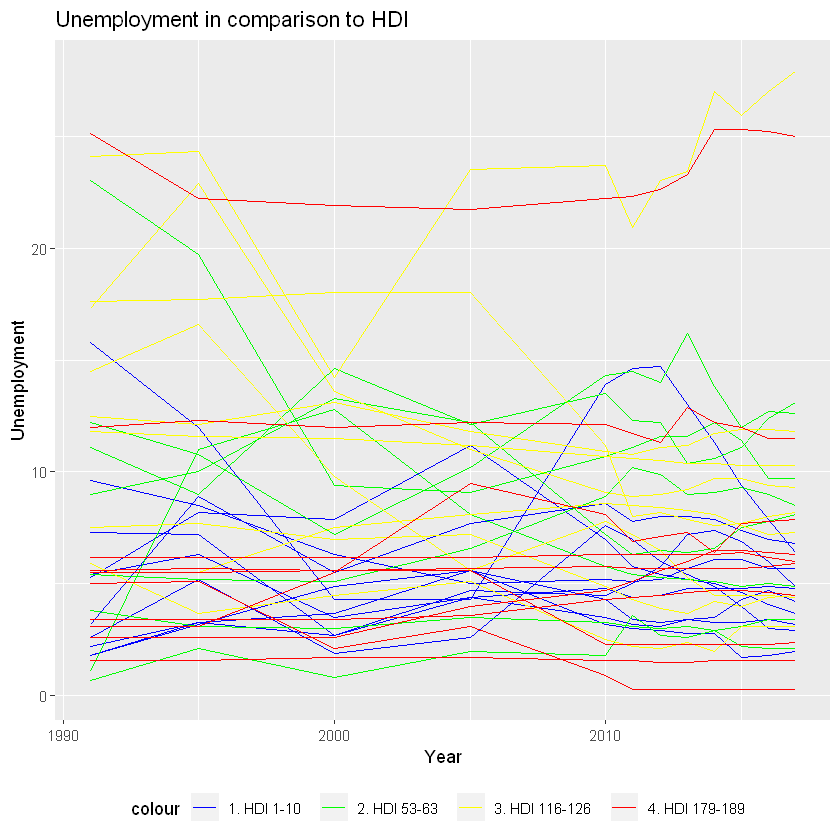

In [31]:
ggplot() + 
    geom_line(data = unemployment_highest, aes(x = Year, y = Factor, group = Country, color = '1. HDI 1-10'))  +
    geom_line(data = unemployment_high, aes(x = Year, y = Factor, group = Country, color = '2. HDI 53-63')) +
    geom_line(data = unemployment_low, aes(x = Year, y = Factor, group = Country, color = '3. HDI 116-126')) +
    geom_line(data = unemployment_lowest, aes(x = Year, y = Factor, group = Country, color = '4. HDI 179-189')) +
    scale_color_manual(values = c('1. HDI 1-10' = 'blue', '2. HDI 53-63' = 'green', '3. HDI 116-126' = 'yellow', '4. HDI 179-189' = 'red')) +
    ggtitle('Unemployment in comparison to HDI') + xlab('Year') + ylab('Unemployment') + theme(legend.position = ("bottom"))

In [32]:
# Get the url of the page and read it into R
url_page <- "https://www.imf.org/external/pubs/ft/weo/2019/01/weodata/weorept.aspx?sy=2017&ey=2024&scsm=1&ssd=1&sort=country&ds=.&br=1&pr1.x=55&pr1.y=7&c=668%2C548%2C193%2C678%2C313%2C316%2C686%2C218%2C688%2C138%2C748%2C618%2C624%2C692%2C142%2C626%2C628%2C565%2C238%2C253%2C643%2C718%2C724%2C576%2C733%2C134%2C336%2C146%2C532%2C176%2C429%2C433%2C178%2C916%2C298%2C443%2C917&s=LUR&grp=0&a="
read_url <- read_html(url_page)

In [33]:
# Observe the actual html structure of the webpage in R
read_url %>%
html_structure()

<html [xmlns, xml:lang, lang]>
  <head>
    <meta [http-equiv, content]>
    <script [type]>
      {cdata}
    <script [type]>
      {cdata}
    <title>
      {text}
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <link [rel, href, type]>
    <link [rel, href, type, media]>
    {comment}
    {comment}
    <script [type]>
      {cdata}
    {comment}
    {comment}
    {comment}
    {comment}
    {comment}
    {comment}
    <script [type, language, src]>
    {comment}
    <script [type]>
      {cdata}
    {comment}
    {comment}
    <script [type]>
      {cdata}
    {comment}
    <script [language, type, src]>
    {comment}
    {comment}
    <script [src]>
    {comment}
  <body.default [bgcolor]>
    {text}
    {c

In [34]:
# Get the tables from webpage into R and select the table number 5
tables <- read_url %>%
html_nodes("table")
unemployment_df <- as.data.frame(tables[5] %>% html_table(fill = TRUE))

In [35]:
# Delete the first two rows unused 
updated_unemployment_df <- unemployment_df[-c(1, 2),]

# Delete the unused column 
unemployment_df$X14 <- NULL

# Rename the column according to the original table scrapped on webpage
names(updated_unemployment_df)[names(updated_unemployment_df) == "X1"] <- "Country"
names(updated_unemployment_df)[names(updated_unemployment_df) == "X2"] <- "Subject Descriptor"
names(updated_unemployment_df)[names(updated_unemployment_df) == "X3"] <- "Units"
names(updated_unemployment_df)[names(updated_unemployment_df) == "X4"] <- "Scale"
names(updated_unemployment_df)[names(updated_unemployment_df) == "X5"] <- "Country/Series-specific Notes"
names(updated_unemployment_df)[names(updated_unemployment_df) == "X6"] <- "2017"
names(updated_unemployment_df)[names(updated_unemployment_df) == "X7"] <- "2018"
names(updated_unemployment_df)[names(updated_unemployment_df) == "X8"] <- "2019"
names(updated_unemployment_df)[names(updated_unemployment_df) == "X9"] <- "2020"
names(updated_unemployment_df)[names(updated_unemployment_df) == "X10"] <- "2021"
names(updated_unemployment_df)[names(updated_unemployment_df) == "X11"] <- "2022"
names(updated_unemployment_df)[names(updated_unemployment_df) == "X12"] <- "2023"
names(updated_unemployment_df)[names(updated_unemployment_df) == "X13"] <- "2024"


# Skip 5th and 6th columns which is unused 
updated_unemployment_df <- updated_unemployment_df %>% select(1:3, `2017`:`2024`)

# Rename some values to join left with the other table to get the HDI
updated_unemployment_df["6", "Country"] <- "Bolivia (Plurinational State of)"
updated_unemployment_df["15", "Country"] <- "Hong Kong, China (SAR)"
updated_unemployment_df["4", "Country"] <- "Bahamas"
updated_unemployment_df["18", "Country"] <- "Iran (Islamic Republic of)"
updated_unemployment_df["23", "Country"] <- "Kyrgyzstan"

In [40]:
#blo <- updated_unemployment_df %>% select (Country, `2017`:`2024`) %>% gather (`2017`: `2024`, key = "year", value = "value")

# Get the HDIs and corresponding countries from the unemployment df
get_HDI_countries <- unemployment %>% select(c(1,2))

# Separate countries into 4 tiers of HDI (highest, high, low, lowest)
highest <- get_HDI_countries %>% subset(HDI %in% (1:10))
high <- get_HDI_countries %>% subset(HDI %in% (54:62))
low <- get_HDI_countries %>% subset(HDI %in% (117:126))
lowest <- get_HDI_countries %>% subset(HDI %in% (179:189))

In [41]:
HDI_countries <- rbind(highest, high, low, lowest)

In [68]:
# Merge two dfs "HDI_countries" and "updated_uneployment_df" together using left join (all the values of the y df will be sorted by the x df)
updated2_unemployment_df <- merge(x = HDI_countries, y = updated_unemployment_df, by = "Country", all.x = TRUE)

unemp_df <- updated2_unemployment_df %>% select(-c(3,4),) %>% arrange(HDI) 

unemp_df$`2017` <- as.numeric(unemp_df$`2017`)
unemp_df$`2018` <- as.numeric(unemp_df$`2018`)
unemp_df$`2019` <- as.numeric(unemp_df$`2019`)
unemp_df$`2020` <- as.numeric(unemp_df$`2020`)
unemp_df$`2021` <- as.numeric(unemp_df$`2021`)
unemp_df$`2022` <- as.numeric(unemp_df$`2022`)
unemp_df$`2023` <- as.numeric(unemp_df$`2023`)
unemp_df$`2024` <- as.numeric(unemp_df$`2024`)

unemp_df <- unemp_df %>% na.omit()

predict_highest <- convert_to_long(unemp_df, (1:10)) 
predict_high <- convert_to_long(unemp_df, (54:63)) 
predict_low <- convert_to_long(unemp_df, (118:137))
predict_lowest <- convert_to_long(unemp_df, (180:189)) # missing data in the lowest HD                             

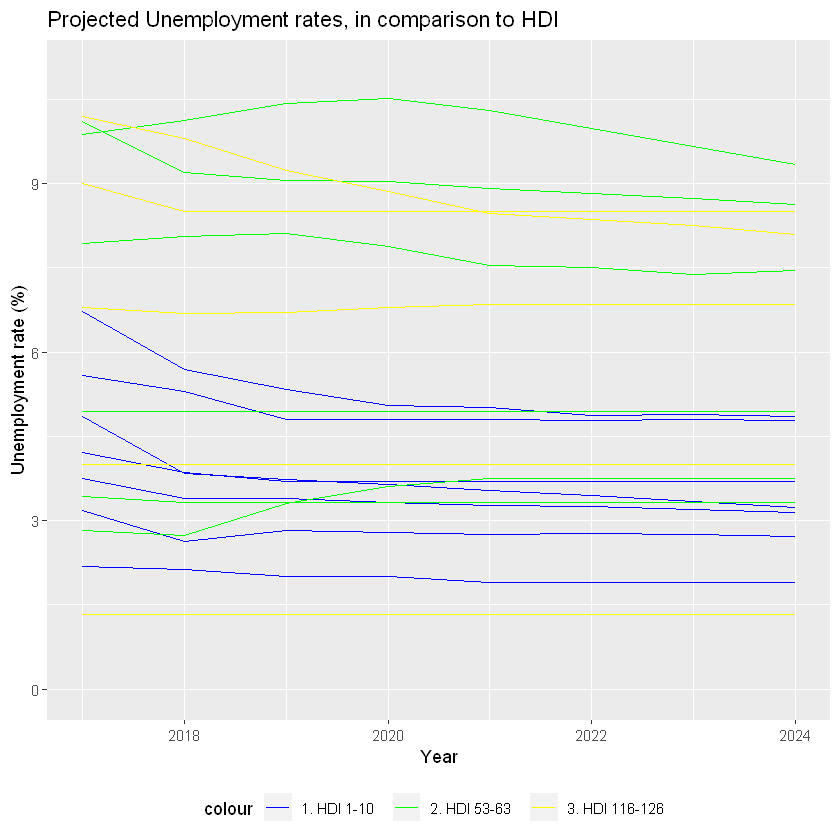

In [69]:
# Line chart
ggplot() +
    geom_line(data = predict_highest, aes(x = Year, y = Factor, group = Country, color = '1. HDI 1-10'))  +
    geom_line(data = predict_high, aes(x = Year, y = Factor, group = Country, color = '2. HDI 53-63')) +
    geom_line(data = predict_low, aes(x = Year, y = Factor, group = Country, color = '3. HDI 116-126')) +
    # geom_line(data = predict_lowest, aes(x = Year, y = Factor, group = Country, color = '4. HDI 179-189')) +
    scale_color_manual(values = c('1. HDI 1-10' = 'blue', '2. HDI 53-63' = 'green', '3. HDI 116-126' = 'yellow', '4. HDI 179-189' = 'red')) +
    ggtitle('Projected Unemployment rates, in comparison to HDI') + xlab('Year') + ylim(0,11) + 
    ylab('Unemployment rate (%)') + theme(legend.position = ("bottom"))

Source: http://hdr.undp.org/en/indicators/67106

In [11]:
income_inequality1 <- read_csv("Income_Inequality.csv")

Parsed with column specification:
cols(
  HDI = col_double(),
  Country = col_character(),
  `2010-2017` = col_double()
)


Country,Inequality,HDI
Australia,34.7,1. HDI 1-10
Germany,31.7,1. HDI 1-10
Iceland,25.6,1. HDI 1-10
Ireland,31.9,1. HDI 1-10
Netherlands,29.3,1. HDI 1-10
Norway,27.5,1. HDI 1-10


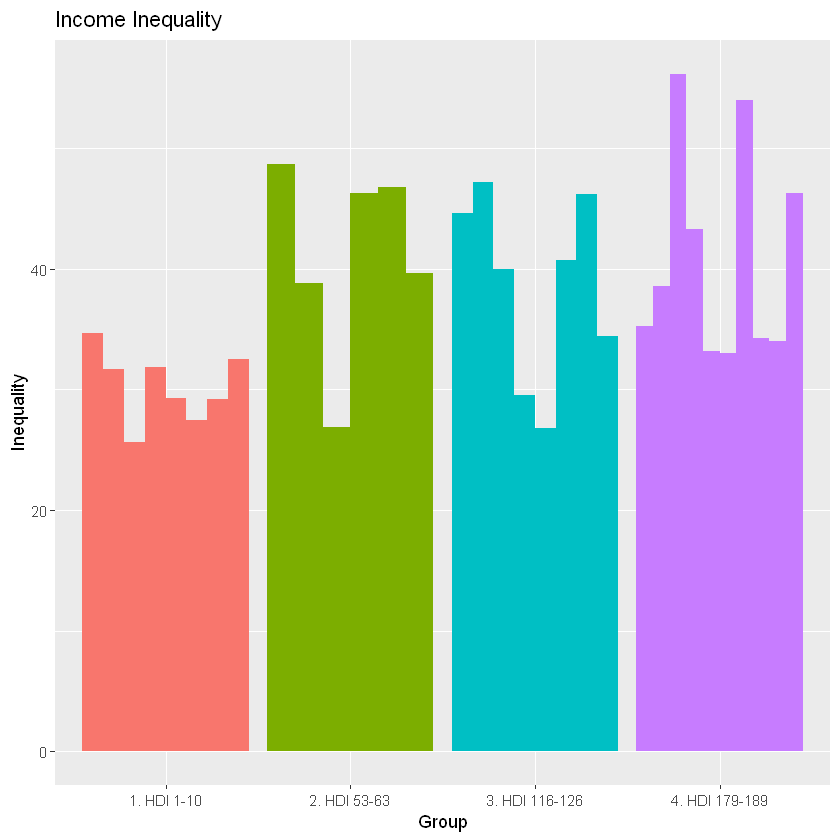

In [12]:
names(income_inequality1)[3] <- 'Inequality'

# Sort by HDI and omit empty columns
income_inequality <- income_inequality1 %>%
    arrange(Inequality) %>%
    na.omit() 

income_inequality_highest <- subset(income_inequality, HDI %in% highest) %>% 
    group_by(Country, Inequality) %>% summarize(HDI="1. HDI 1-10")
income_inequality_high <- subset(income_inequality, HDI %in% high) %>% 
    group_by(Country, Inequality) %>% summarize(HDI="2. HDI 53-63")
income_inequality_low <- subset(income_inequality, HDI %in% low) %>% 
    group_by(Country, Inequality) %>% summarize(HDI="3. HDI 116-126")
income_inequality_lowest <- subset(income_inequality, HDI %in% lowest) %>% 
    group_by(Country, Inequality) %>% summarize(HDI="4. HDI 179-189")
income_inequality3 <- rbind(income_inequality_highest, income_inequality_high, income_inequality_low, income_inequality_lowest)

head(income_inequality_highest)
ggplot() + 
    geom_bar(data = income_inequality3, aes(x = HDI, y = Inequality, group=Country , fill=HDI), stat='identity',  position="dodge") +
    ggtitle('Income Inequality') + xlab('Group') + ylab('Inequality') + theme(legend.position = ("none"))

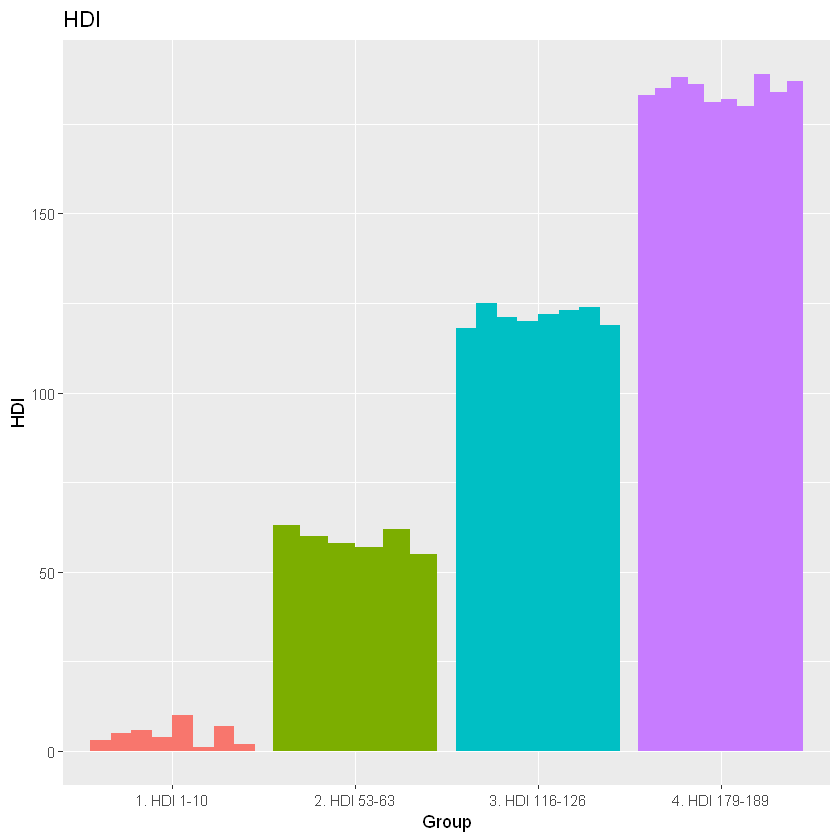

In [13]:
income_inequality_highest <- subset(income_inequality, HDI %in% highest) %>% 
    group_by(Country, HDI) %>% summarize(Group="1. HDI 1-10")
income_inequality_high <- subset(income_inequality, HDI %in% high) %>% 
    group_by(Country, HDI) %>% summarize(Group="2. HDI 53-63")
income_inequality_low <- subset(income_inequality, HDI %in% low) %>% 
    group_by(Country, HDI) %>% summarize(Group="3. HDI 116-126")
income_inequality_lowest <- subset(income_inequality, HDI %in% lowest) %>% 
    group_by(Country, HDI) %>% summarize(Group="4. HDI 179-189")
income_inequality3 <- rbind(income_inequality_highest, income_inequality_high, income_inequality_low, income_inequality_lowest)

ggplot() + 
    geom_bar(data = income_inequality3, aes(x = Group, y = HDI, group=Country , fill=Group), stat='identity',  position="dodge") +
    ggtitle('HDI') + xlab('Group') + ylab('HDI') + theme(legend.position = ("none"))


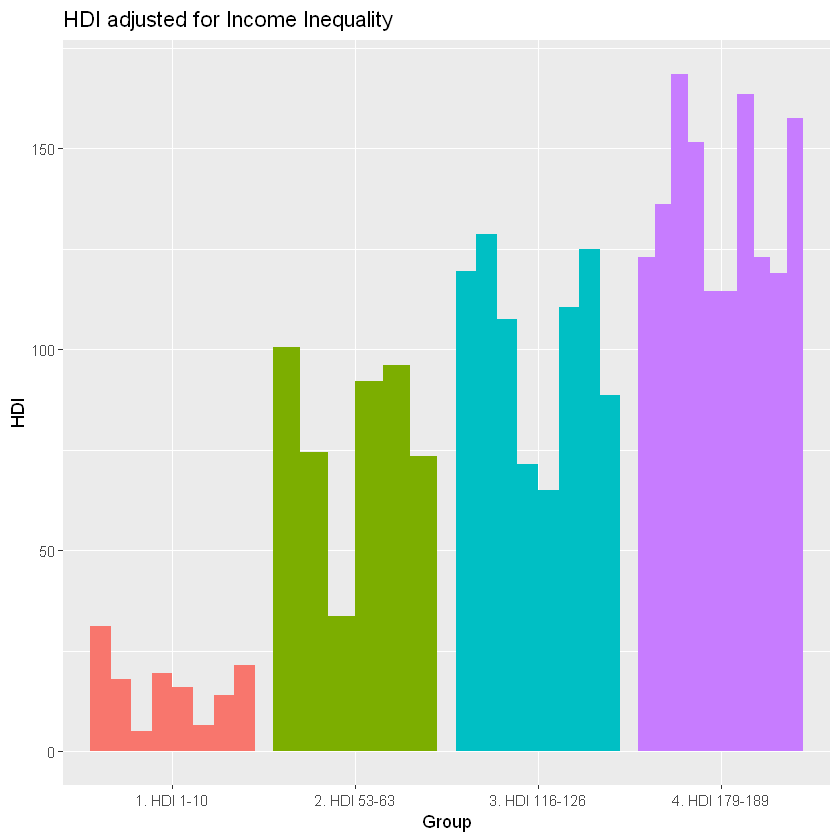

In [14]:
income_inequality4 <- income_inequality

income_inequality4$Rank <- 1:nrow(income_inequality4) 

income_inequality4$Combine <- ((income_inequality4$HDI+income_inequality4$Rank)/2)

income_inequality_highest <- subset(income_inequality4, HDI %in% highest) %>% 
    group_by(Country, Combine) %>% summarize(HDI="1. HDI 1-10")
income_inequality_high <- subset(income_inequality4, HDI %in% high) %>% 
    group_by(Country, Combine) %>% summarize(HDI="2. HDI 53-63")
income_inequality_low <- subset(income_inequality4, HDI %in% low) %>% 
    group_by(Country, Combine) %>% summarize(HDI="3. HDI 116-126")
income_inequality_lowest <- subset(income_inequality4, HDI %in% lowest) %>% 
    group_by(Country, Combine) %>% summarize(HDI="4. HDI 179-189")
income_inequality3 <- rbind(income_inequality_highest, income_inequality_high, income_inequality_low, income_inequality_lowest)

ggplot() + 
    geom_bar(data = income_inequality3, aes(x = HDI, y = Combine, group=Country , fill=HDI), stat='identity',  position="dodge") +
    ggtitle('HDI adjusted for Income Inequality') + xlab('Group') + ylab('HDI') + theme(legend.position = ("none"))


Source: http://hdr.undp.org/en/indicators/48806

In [15]:
male_employment <- read_csv("Male_Employment.csv")

Parsed with column specification:
cols(
  HDI = col_double(),
  Country = col_character(),
  `1990` = col_double(),
  `1995` = col_double(),
  `2000` = col_double(),
  `2005` = col_double(),
  `2010` = col_double(),
  `2011` = col_double(),
  `2012` = col_double(),
  `2013` = col_double(),
  `2014` = col_double(),
  `2015` = col_double(),
  `2016` = col_double(),
  `2017` = col_double()
)


In [16]:
# Filter out empty columns, and remove 1990 column, sort by HDI rank 
male_employment <- male_employment %>%
    arrange(HDI) %>%
    na.omit()

# Create dataframe for eachs set of HDI indexes
male_employment_highest <- convert_to_long(male_employment, highest)
male_employment_high <- convert_to_long(male_employment, high)
male_employment_low <- convert_to_long(male_employment, low)
male_employment_lowest <- convert_to_long(male_employment, lowest)

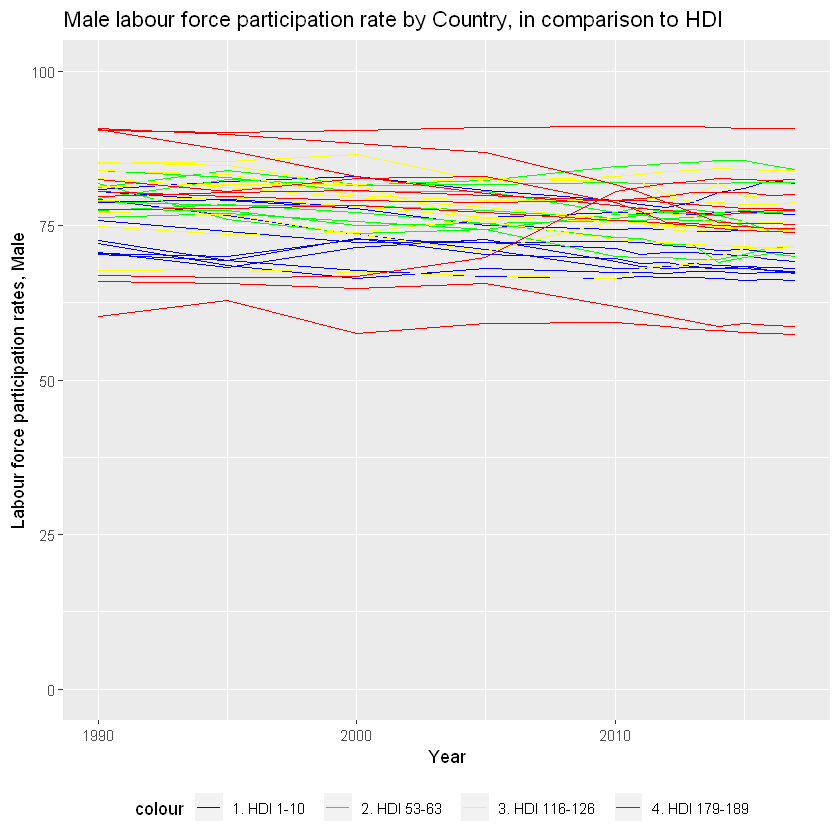

In [17]:
ggplot() + 
    geom_line(data = male_employment_highest, aes(x = Year, y = Factor, group = Country, color = '1. HDI 1-10'))  +
    geom_line(data = male_employment_high, aes(x = Year, y = Factor, group = Country, color = '2. HDI 53-63')) +
    geom_line(data = male_employment_low, aes(x = Year, y = Factor, group = Country, color = '3. HDI 116-126')) +
    geom_line(data = male_employment_lowest, aes(x = Year, y = Factor, group = Country, color = '4. HDI 179-189')) +
    scale_color_manual(values = c('1. HDI 1-10' = 'blue', '2. HDI 53-63' = 'green', '3. HDI 116-126' = 'yellow', '4. HDI 179-189' = 'red')) +
    ggtitle('Male labour force participation rate by Country, in comparison to HDI') + xlab('Year') + ylim(0,100) +
    ylab('Labour force participation rates, Male') + theme(legend.position = ("bottom"))

http://hdr.undp.org/en/indicators/48706

In [18]:
female_employment <- read_csv("Female_Employment.csv")

Parsed with column specification:
cols(
  HDI = col_double(),
  Country = col_character(),
  `1990` = col_double(),
  `1995` = col_double(),
  `2000` = col_double(),
  `2005` = col_double(),
  `2010` = col_double(),
  `2011` = col_double(),
  `2012` = col_double(),
  `2013` = col_double(),
  `2014` = col_double(),
  `2015` = col_double(),
  `2016` = col_double(),
  `2017` = col_double()
)


In [19]:
# Filter out empty columns, sort by HDI rank 
female_employment <- female_employment %>%
    arrange(HDI) %>%
    na.omit()

# Create dataframe for eachs set of HDI indexes
female_employment_highest <- convert_to_long(female_employment, highest)
female_employment_high <- convert_to_long(female_employment, high)
female_employment_low <- convert_to_long(female_employment, low)
female_employment_lowest <- convert_to_long(female_employment, lowest)



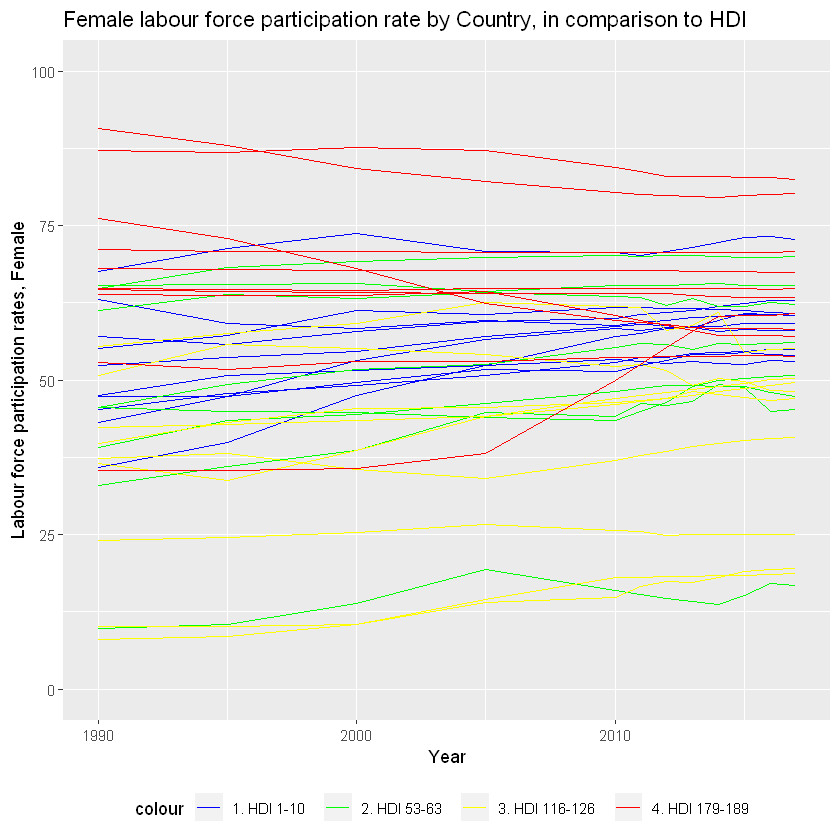

In [20]:
ggplot() + 
    geom_line(data = female_employment_highest, aes(x = Year, y = Factor, group = Country, color = '1. HDI 1-10'))  +
    geom_line(data = female_employment_high, aes(x = Year, y = Factor, group = Country, color = '2. HDI 53-63')) +
    geom_line(data = female_employment_low, aes(x = Year, y = Factor, group = Country, color = '3. HDI 116-126')) +
    geom_line(data = female_employment_lowest, aes(x = Year, y = Factor, group = Country, color = '4. HDI 179-189')) +
    scale_color_manual(values = c('1. HDI 1-10' = 'blue', '2. HDI 53-63' = 'green', '3. HDI 116-126' = 'yellow', '4. HDI 179-189' = 'red')) +
    ggtitle('Female labour force participation rate by Country, in comparison to HDI') + xlab('Year') + ylim(0,100) + 
    ylab('Labour force participation rates, Female') + theme(legend.position = ("bottom"))